In [1]:
# Импортируем TensorFlow для обучения
import tensorflow as tf
from tensorflow import keras

In [2]:
# Импорт вспомогательных библиотек
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.utils import to_categorical

In [4]:
# Загружаем данные для обучения нейронной сети
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Масштабируем значения пикселей
train_images = train_images / 255
test_images = test_images / 255

In [6]:
# Преобразование правильных ответов в категории
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [8]:
# Построение модели нейронной сети
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(10, activation = 'softmax')])

In [9]:
# Указываем параметры, которые добавятся на этапе компиляции
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ["accuracy"])

In [10]:
# Обучаем модель
model.fit(train_images, train_labels, batch_size=32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4707 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9255


In [11]:
# Точность на тестовом наборе
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9253
Loss = 0.270
Accuracy = 0.925


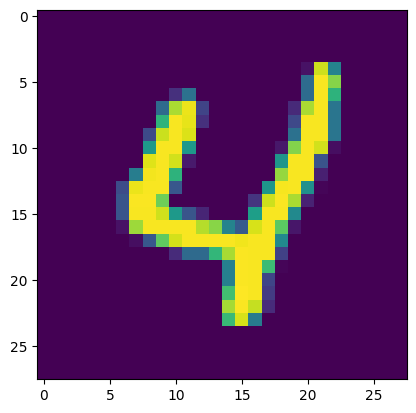

313/313 [==============================] - 2s 6ms/step
Prediction 4


In [12]:
# Теперь используем модель для предсказания цифры на случайном изображении
n = random.randint(0, 9999)
plt.imshow(test_images[n])
plt.show()
prediction = model.predict(test_images)
print("Prediction %d" % np.argmax(prediction[n]))

In [14]:
# Изменяем параметр batch_size до 1
model.fit(train_images, train_labels, batch_size=1, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3004 - accuracy: 0.9188
Epoch 2/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2985 - accuracy: 0.9207
Epoch 3/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2960 - accuracy: 0.9226
Epoch 4/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2965 - accuracy: 0.9226
Epoch 5/5
60000/60000 [==============================] - 136s 2ms/step - loss: 0.2932 - accuracy: 0.9237


In [24]:
# Вывод при batch_size = 1 - точность модели снизилась

In [18]:
# Пробуем изменить batch_size до 100, а epochs увеличим до 10
model.fit(train_images, train_labels, batch_size = 100, epochs = 10)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2312 - accuracy: 0.9374
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2306 - accuracy: 0.9378
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9379
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9374
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9369
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9376
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9375
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.9374
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9373
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2283 - accuracy: 0.9373

In [23]:
# Вывод: Пропуск значений весов большой партии и склонность к переобучению

In [19]:
# Пробуем изменить epochs до 10, batch_size стандартный
model.fit(train_images, train_labels, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2344 - accuracy: 0.9359
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2325 - accuracy: 0.9355
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9362
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2312 - accuracy: 0.9358
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2304 - accuracy: 0.9364
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9363
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2300 - accuracy: 0.9364
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2303 - accuracy: 0.9361
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9362
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.229

In [20]:
# Пробуем изменить batch_size до 64, а epochs остается 5
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2250 - accuracy: 0.9376
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2254 - accuracy: 0.9378
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2255 - accuracy: 0.9384
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2253 - accuracy: 0.9376
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2256 - accuracy: 0.9377


In [21]:
# Пробуем изменить batch_size до 64, а epochs до 10
model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2255 - accuracy: 0.9380
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2254 - accuracy: 0.9376
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2252 - accuracy: 0.9378
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2248 - accuracy: 0.9383
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2246 - accuracy: 0.9374
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2245 - accuracy: 0.9380
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2246 - accuracy: 0.9379
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2244 - accuracy: 0.9380
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2242 - accuracy: 0.9380
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2240 - accuracy: 0.9379

In [22]:
# Точность на тренировочных данных выросла, но есть эффект переобучения

In [32]:
# Построение модели нейронной сети с новым слоем
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # Добавляем слой на 128 связей, с ф-ей активации ReLU
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')])

# Компилируем модель и указываем параметры
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ["accuracy"])

# тестируем
model.fit(train_images, train_labels, batch_size = 32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2624 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1163 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0797 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0608 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0460 - accuracy: 0.9854


In [34]:
# В результате добавления слоя, точность стала лучше

In [33]:
# тестируем модель с добавленным слоем и новым вариантом параметров
model.fit(train_images, train_labels, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.009

In [35]:
# Вывод - модель переобучена

In [36]:
# тестируем модель с добавленным слоем и новым вариантом параметров
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0051 - accuracy: 0.9982
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0031 - accuracy: 0.9992


In [37]:
# Вывод - модель переобучена

In [43]:
# Построение модели нейронной сети с новым слоем
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # Добавляем слой Dropout
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')])

# Компилируем модель и указываем параметры
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ["accuracy"])

# тестируем на стандартных параметрах
model.fit(train_images, train_labels, batch_size = 32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2994 - accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1445 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1064 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0863 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0751 - accuracy: 0.9761


In [40]:
# увеличим значение epochs до 10
model.fit(train_images, train_labels, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0418 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0356 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0320 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0315 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0294 - accuracy: 0.9900
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.029

In [42]:
# увеличим значение batch_size до 64 epochs оставим 5
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0212 - accuracy: 0.9928
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0209 - accuracy: 0.9928
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0212 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0196 - accuracy: 0.9934


In [44]:
# Построение модели нейронной сети с другим значением связей
# и Dropout 0.3
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # Меняем 0.2 на 0.3
  tf.keras.layers.Dropout(0.3),
  # увеличиваем кол-во связей до 256
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')])

# Компилируем модель и указываем параметры
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ["accuracy"])

# тестируем на стандартных параметрах
model.fit(train_images, train_labels, batch_size = 32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 20s 6ms/step - loss: 0.2913 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1395 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1077 - accuracy: 0.9655
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0880 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0768 - accuracy: 0.9753


In [45]:
# Вывод - точность обучения увеличилась

In [46]:
# увеличим epochs до 10
model.fit(train_images, train_labels, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0684 - accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0626 - accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0548 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0532 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0482 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0462 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0443 - accuracy: 0.9854
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0417 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0388 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - lo

In [47]:
# batch_size = 64, epochs = 5
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0294 - accuracy: 0.9900
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0273 - accuracy: 0.9907
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0273 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0269 - accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0269 - accuracy: 0.9908


In [48]:
# batch_size = 64, epochs = 10
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0265 - accuracy: 0.9905
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0234 - accuracy: 0.9919


In [49]:
# Построение модели нейронной сети сразу с двумя сломи
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # первые 2 слоя
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  # вторые два слоя
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation = 'softmax')])

# Компилируем модель и указываем параметры
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ["accuracy"])

# тестируем на стандартных параметрах
model.fit(train_images, train_labels, batch_size = 32, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2468 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1149 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0882 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0737 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0620 - accuracy: 0.9804


In [50]:
# epochs = 10
model.fit(train_images, train_labels, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0544 - accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0504 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0438 - accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0395 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0387 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0348 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0303 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0299 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [51]:
# batch_size = 64, epochs = 5
model.fit(train_images, train_labels, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0163 - accuracy: 0.9946


In [52]:
# batch_size = 64, epochs = 10
model.fit(train_images, train_labels, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0165 - accuracy: 0.9943
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0147 - accuracy: 0.9947
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0142 - accuracy: 0.9954
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0134 - accuracy: 0.9958
Epoch 10/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0141 - accuracy: 0.99

In [53]:
# Вывод:

# Увеличение значений параметров модели
# не всегда приводит к улучшению нейросети.

# batch_size имеет смысл оставлять на уровне 32
# в большинстве случаев.

# Также, стоит учитывать, что параметры необходимо
# подбирать индивидуально, чтобы исключить
# возможность переобучения модели.